## Data exploration

In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
df = pd.read_csv('data/data/driving_log.csv')

In [3]:
df.head()

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


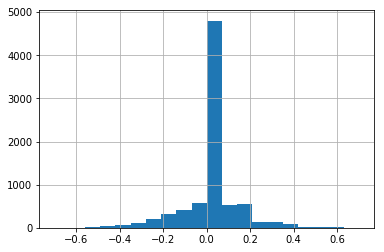

In [4]:
df['steering'].hist(bins=20, range=(-0.7,0.7))

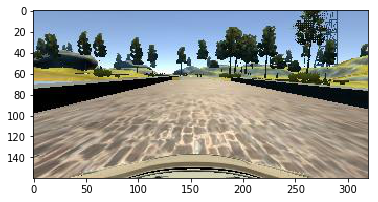

In [5]:
image = mpimg.imread('data/data/' + df['center'][0])
plt.imshow(image)

In [6]:
image.shape

(160, 320, 3)

### Cropping

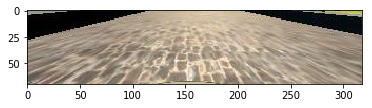

In [7]:
cropped = image[70:140,1:319]
plt.imshow(cropped)

### Resizing

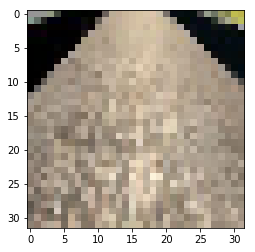

In [8]:
resized = cv2.resize(cropped, (32, 32))
plt.imshow(resized)

### Flipping
 - Horizontal Flip: cv2.flip(image,0)
 - Vertical Flip: cv2.flip(image,1)
 - Horizontal & Vertical Flip: cv2.flip( img, -1 )

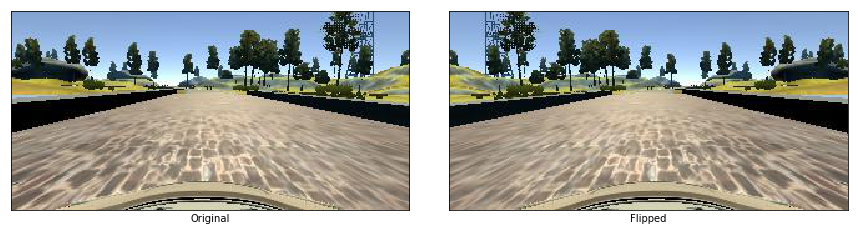

In [24]:
vertical_flipped= cv2.flip(image,1)
imgs = [image, vertical_flipped]
xlabels = ["Original","Flipped"]
fig, axes = plt.subplots(1,2, figsize=(15,10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i, ax in enumerate(axes.flat):
    ax.imshow(imgs[i])
    ax.set_xticks([])
    ax.set_yticks([])    
    ax.set_xlabel(xlabels[i])

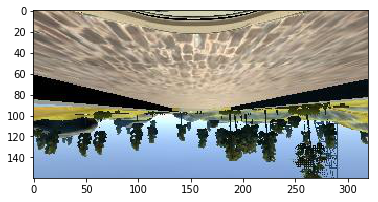

In [17]:
horizontal_flipped = cv2.flip(image,0)
plt.imshow(horizontal_flipped)

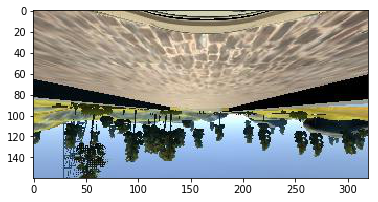

In [15]:
both = cv2.flip(image,-1)
plt.imshow(both)

### Images from Left, Center, Right cameras

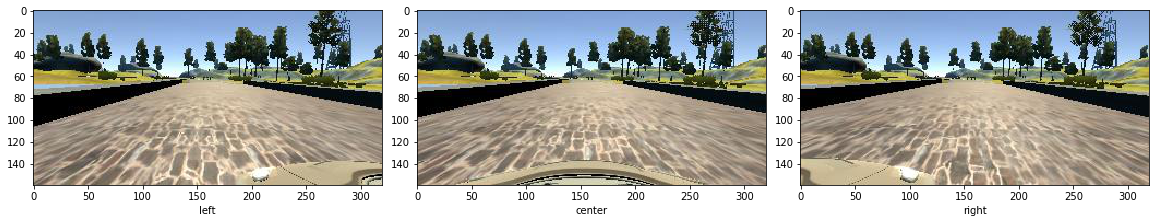

In [25]:
paths = [df['left'][0],df['center'][0],df['right'][0]]
images = [mpimg.imread('data/data/' + path.strip()) for path in paths]
xlabels = ["left","center","right"]
fig, axes = plt.subplots(1,3, figsize=(20,10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    #ax.set_xticks([])
    #ax.set_yticks([])    
    ax.set_xlabel(xlabels[i])

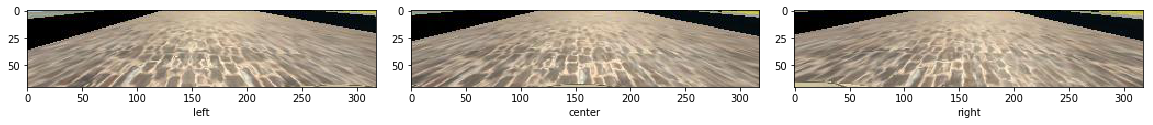

In [26]:
cropped = [ image[70:140,1:319] for image in images]
xlabels = ["left","center","right"]
fig, axes = plt.subplots(1,3, figsize=(20,10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i, ax in enumerate(axes.flat):
    ax.imshow(cropped[i])
    #ax.set_xticks([])
    #ax.set_yticks([])    
    ax.set_xlabel(xlabels[i])

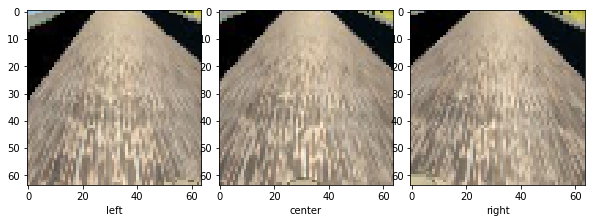

In [30]:
resized = [ cv2.resize(crop, (64, 64)) for crop in cropped]
xlabels = ["left","center","right"]
fig, axes = plt.subplots(1,3, figsize=(10,5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i, ax in enumerate(axes.flat):
    ax.imshow(resized[i])
    #ax.set_xticks([])
    #ax.set_yticks([])    
    ax.set_xlabel(xlabels[i])

## Troubleshooting shape difference 
Udacity data vs. own generated data

In [2]:
path_u = 'data2/data/IMG/center_2016_12_01_13_31_14_398.jpg'
path0 = 'data0/IMG/center_2017_07_21_19_42_13_796.jpg'
path1 = 'data/IMG/center_2017_07_12_22_35_42_904.jpg'

In [3]:
img_u = mpimg.imread(path_u)
img0 = mpimg.imread(path0)
img1 = mpimg.imread(path1)

In [5]:
print(img_u.shape)
print(img0.shape)
print(img1.shape)

(160, 320, 3)
(160, 320, 3)
(160, 320, 3)


In [78]:
df_u = pd.read_csv('data2/data/driving_log.csv')

In [79]:
df_u.head()

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


In [77]:
df_u[0][1]

'IMG/center_2016_12_01_13_30_48_287.jpg'

In [20]:
df_u['center'][0].split('/')[-1]

'center_2016_12_01_13_30_48_287.jpg'

In [81]:
df0 = pd.read_csv('data0/driving_log.csv')
df0.head()

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2017_07_21_19_42_08_694.jpg,IMG/left_2017_07_21_19_42_08_694.jpg,IMG/right_2017_07_21_19_42_08_694.jpg,0.0,0.0,0,15.22545
1,IMG/center_2017_07_21_19_42_08_760.jpg,IMG/left_2017_07_21_19_42_08_760.jpg,IMG/right_2017_07_21_19_42_08_760.jpg,0.0,0.0,0,14.89454
2,IMG/center_2017_07_21_19_42_08_828.jpg,IMG/left_2017_07_21_19_42_08_828.jpg,IMG/right_2017_07_21_19_42_08_828.jpg,0.0,0.0,0,14.77000
3,IMG/center_2017_07_21_19_42_08_897.jpg,IMG/left_2017_07_21_19_42_08_897.jpg,IMG/right_2017_07_21_19_42_08_897.jpg,0.0,0.0,0,14.91671
4,IMG/center_2017_07_21_19_42_08_966.jpg,IMG/left_2017_07_21_19_42_08_966.jpg,IMG/right_2017_07_21_19_42_08_966.jpg,0.0,0.0,0,14.79983


In [66]:
df0 = pd.read_csv('data0/driving_log.csv', header=None)
df0.head()

,0,1,2,3,4,5,6
0,C:\Udacity\carND\CarND-Behavioral-Cloning-P3\d...,C:\Udacity\carND\CarND-Behavioral-Cloning-P3\d...,C:\Udacity\carND\CarND-Behavioral-Cloning-P3\d...,0.0,0.0,0,15.22545
1,C:\Udacity\carND\CarND-Behavioral-Cloning-P3\d...,C:\Udacity\carND\CarND-Behavioral-Cloning-P3\d...,C:\Udacity\carND\CarND-Behavioral-Cloning-P3\d...,0.0,0.0,0,14.89454
2,C:\Udacity\carND\CarND-Behavioral-Cloning-P3\d...,C:\Udacity\carND\CarND-Behavioral-Cloning-P3\d...,C:\Udacity\carND\CarND-Behavioral-Cloning-P3\d...,0.0,0.0,0,14.77000
3,C:\Udacity\carND\CarND-Behavioral-Cloning-P3\d...,C:\Udacity\carND\CarND-Behavioral-Cloning-P3\d...,C:\Udacity\carND\CarND-Behavioral-Cloning-P3\d...,0.0,0.0,0,14.91671
4,C:\Udacity\carND\CarND-Behavioral-Cloning-P3\d...,C:\Udacity\carND\CarND-Behavioral-Cloning-P3\d...,C:\Udacity\carND\CarND-Behavioral-Cloning-P3\d...,0.0,0.0,0,14.79983


In [67]:
df0[0][0].split('\\')[-1]

'center_2017_07_21_19_42_08_694.jpg'

In [68]:
df0[0][0].split('\\')

['C:',
 'Udacity',
 'carND',
 'CarND-Behavioral-Cloning-P3',
 'data0',
 'IMG',
 'center_2017_07_21_19_42_08_694.jpg']

In [32]:
df0.shape

(186, 7)

### add header

In [33]:
df0.columns = ["center", "left", "right", "steering","throttle","brake","speed"]

In [40]:
df0.head()

,center,left,right,steering,throttle,brake,speed
0,C:\Udacity\carND\CarND-Behavioral-Cloning-P3\d...,C:\Udacity\carND\CarND-Behavioral-Cloning-P3\d...,C:\Udacity\carND\CarND-Behavioral-Cloning-P3\d...,0.0,0.0,0,15.22545
1,C:\Udacity\carND\CarND-Behavioral-Cloning-P3\d...,C:\Udacity\carND\CarND-Behavioral-Cloning-P3\d...,C:\Udacity\carND\CarND-Behavioral-Cloning-P3\d...,0.0,0.0,0,14.89454
2,C:\Udacity\carND\CarND-Behavioral-Cloning-P3\d...,C:\Udacity\carND\CarND-Behavioral-Cloning-P3\d...,C:\Udacity\carND\CarND-Behavioral-Cloning-P3\d...,0.0,0.0,0,14.77000
3,C:\Udacity\carND\CarND-Behavioral-Cloning-P3\d...,C:\Udacity\carND\CarND-Behavioral-Cloning-P3\d...,C:\Udacity\carND\CarND-Behavioral-Cloning-P3\d...,0.0,0.0,0,14.91671
4,C:\Udacity\carND\CarND-Behavioral-Cloning-P3\d...,C:\Udacity\carND\CarND-Behavioral-Cloning-P3\d...,C:\Udacity\carND\CarND-Behavioral-Cloning-P3\d...,0.0,0.0,0,14.79983


### update the filepath

In [39]:
df0['left'][0].split("\\")

['C:',
 'Udacity',
 'carND',
 'CarND-Behavioral-Cloning-P3',
 'data0',
 'IMG',
 'left_2017_07_21_19_42_08_694.jpg']

In [54]:
df0['left'].str.split("\\").str[-2:].head()

0    [IMG, left_2017_07_21_19_42_08_694.jpg]
1    [IMG, left_2017_07_21_19_42_08_760.jpg]
2    [IMG, left_2017_07_21_19_42_08_828.jpg]
3    [IMG, left_2017_07_21_19_42_08_897.jpg]
4    [IMG, left_2017_07_21_19_42_08_966.jpg]
Name: left, dtype: object

In [62]:
df0['center'] = df0['center'].str.split("\\").str[-2:].str.join('/')
df0['left'] = df0['left'].str.split("\\").str[-2:].str.join('/')
df0['right'] = df0['right'].str.split("\\").str[-2:].str.join('/')

In [63]:
df0.head()

,center,left,right,steering,throttle,brake,speed,img,name
0,IMG/center_2017_07_21_19_42_08_694.jpg,IMG/left_2017_07_21_19_42_08_694.jpg,IMG/right_2017_07_21_19_42_08_694.jpg,0.0,0.0,0,15.22545,IMG,left_2017_07_21_19_42_08_694.jpg
1,IMG/center_2017_07_21_19_42_08_760.jpg,IMG/left_2017_07_21_19_42_08_760.jpg,IMG/right_2017_07_21_19_42_08_760.jpg,0.0,0.0,0,14.89454,IMG,left_2017_07_21_19_42_08_760.jpg
2,IMG/center_2017_07_21_19_42_08_828.jpg,IMG/left_2017_07_21_19_42_08_828.jpg,IMG/right_2017_07_21_19_42_08_828.jpg,0.0,0.0,0,14.77000,IMG,left_2017_07_21_19_42_08_828.jpg
3,IMG/center_2017_07_21_19_42_08_897.jpg,IMG/left_2017_07_21_19_42_08_897.jpg,IMG/right_2017_07_21_19_42_08_897.jpg,0.0,0.0,0,14.91671,IMG,left_2017_07_21_19_42_08_897.jpg
4,IMG/center_2017_07_21_19_42_08_966.jpg,IMG/left_2017_07_21_19_42_08_966.jpg,IMG/right_2017_07_21_19_42_08_966.jpg,0.0,0.0,0,14.79983,IMG,left_2017_07_21_19_42_08_966.jpg
